# Visualize the experiment results

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
relevant = [file for file in os.listdir() if file.endswith('.mat')]

In [3]:
relevantu = [file for file in relevant if 'u' in file]
relevantx = [file for file in relevant if 'T4' in file]


relevantu_train = [file for file in relevantu if '0-5m' in file]
relevantx_train = [file for file in relevantx if '0-5m' in file]
relevantu_test = [file for file in relevantu if '5-5m' in file]
relevantx_test = [file for file in relevantx if '5-5m' in file]


In [4]:
sorted(relevantx_test)

['T50-d05-5m_T4.mat', 'T50-d15-5m_T4.mat', 'T50-d25-5m_T4.mat']

In [5]:
# Load the .mat file
data = loadmat('u50-d10-5m.mat')



In [6]:
data['uout'][:,0]

array([   0,    1,    2, ..., 1498, 1499, 1500], dtype=uint16)

In [7]:
shift = 300
simu = len(data['uout']) - shift
u_train = np.zeros((simu*len(relevantu_train)))
for index, file in enumerate(sorted(relevantu_train)):
    data = loadmat(file)
    u_train[index*simu:index*simu+simu] = data['uout'][shift:,1]

with open('u_train.pkl', 'wb') as file: 
    pickle.dump(u_train, file)

In [8]:
shift = 300
simu = len(data['uout']) - shift
u_test = np.zeros((simu*len(relevantu_test)))
for index, file in enumerate(sorted(relevantu_test)):
    data = loadmat(file)
    u_test[index*simu:index*simu+simu] = data['uout'][shift:,1]

with open('u_test.pkl', 'wb') as file:
    pickle.dump(u_test, file)

In [9]:
# shift = 300
# simu = len(data['uout']) - shift
# u = np.zeros((simu*len(relevantu)))
# for index, file in enumerate(sorted(relevantu)):
#     data = loadmat(file)
#     u[index*simu:index*simu+simu] = data['uout'][shift:,1]

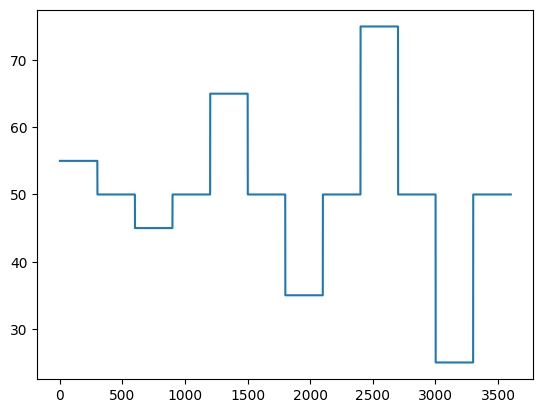

In [10]:
plt.plot(u_test)

In [11]:
data = loadmat('T50-d10-5m_T4.mat')
data['T4'][:,0]

array([37.53665689, 37.53665689, 37.68328446, ..., 46.18768328,
       46.33431085, 46.18768328])

In [12]:
simx = len(data['T4']) - shift
x_train = np.zeros((simx*len(relevantx_train)))
for index, file in enumerate(sorted(relevantx_train)):
    data = loadmat(file)
    x_train[index*simx:index*simx+simx] = data['T4'][shift:,0]
    
with open('x_train.pkl', 'wb') as file:
    pickle.dump(x_train, file)
    

In [13]:
simx = len(data['T4']) - shift
x_test = np.zeros((simx*len(relevantx_test)))
for index, file in enumerate(sorted(relevantx_test)):
    data = loadmat(file)
    x_test[index*simx:index*simx+simx] = data['T4'][shift:,0]
    
with open('x_test.pkl', 'wb') as file:
    pickle.dump(x_test, file)
    

In [14]:
x_train.reshape(-1,1)

array([[46.62756598],
       [46.77419355],
       [46.92082111],
       ...,
       [45.60117302],
       [45.60117302],
       [45.60117302]])

In [15]:
train_real = {'Y': x_train.reshape(-1,1), 'U': u_train.reshape(-1,1)}
test_real = {'Y': x_test.reshape(-1,1), 'U': u_test.reshape(-1,1)}

with open('train_real.pkl', 'wb') as file:
    pickle.dump(train_real, file)
    
with open('test_real.pkl', 'wb') as file:
    pickle.dump(test_real, file)

In [ ]:
plt.plot(train_real)

In [16]:
simx = len(data['T4']) - shift
x = np.zeros((simx*len(relevantx)))
for index, file in enumerate(sorted(relevantx)):
    data = loadmat(file)
    x[index*simx:index*simx+simx] = data['T4'][shift:,0]
    

In [17]:
data = loadmat('u50-d10-5m.mat')

In [18]:
simu = len(data['uout']) - shift
u = np.zeros((simu*len(relevantu)))
for index, file in enumerate(sorted(relevantu)):
    data = loadmat(file)
    print(data['uout'][shift:,0].shape)
    u[index*simu:index*simu+simu] = data['uout'][shift:,1]
    

(1201,)
(1201,)
(1201,)
(1201,)
(1201,)
(1201,)


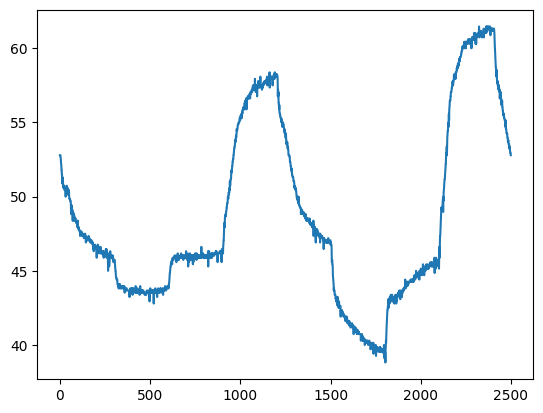

In [19]:
plt.plot(x[1500:4000])

In [20]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [21]:
len(x_train)/300

12.01

In [22]:
u

array([55., 55., 55., ..., 50., 50., 50.])

In [23]:
import joblib

scaler = joblib.load('scaler.pkl')
scalerU = joblib.load('scalerU.pkl')
x = scaler.transform(x.reshape(-1,1))
u = scalerU.transform(u.reshape(-1,1))
dif = scalerU.transform(np.array([50]).reshape(-1,1))

In [24]:
u

array([[0.32746319],
       [0.32746319],
       [0.32746319],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [25]:
int(len(x)/300)


24

In [26]:
ident_data = np.zeros((int(len(x)/300),300))


for i in range(0,len(x)-3, 300):
    normx = (x[i:i+300] - x[i]) / (u[i+100] - dif)
    ident_data[i//300] = normx.flatten()
    print(dif - u[i+100])
    dif = u[i+100]

[[-0.32746319]]
[0.32746319]
[0.32746319]
[-0.32746319]
[-0.65492639]
[0.65492639]
[0.65492639]
[-0.65492639]
[-0.98238958]
[0.98238958]
[0.98238958]
[-0.98238958]
[-1.30985277]
[1.30985277]
[1.30985277]
[-1.30985277]
[-1.63731597]
[1.63731597]
[1.63731597]
[-1.63731597]
[-1.96477916]
[1.96477916]
[1.96477916]
[-1.96477916]


IndexError: index 7300 is out of bounds for axis 0 with size 7206

In [32]:
ident_data.shape

(24, 300)

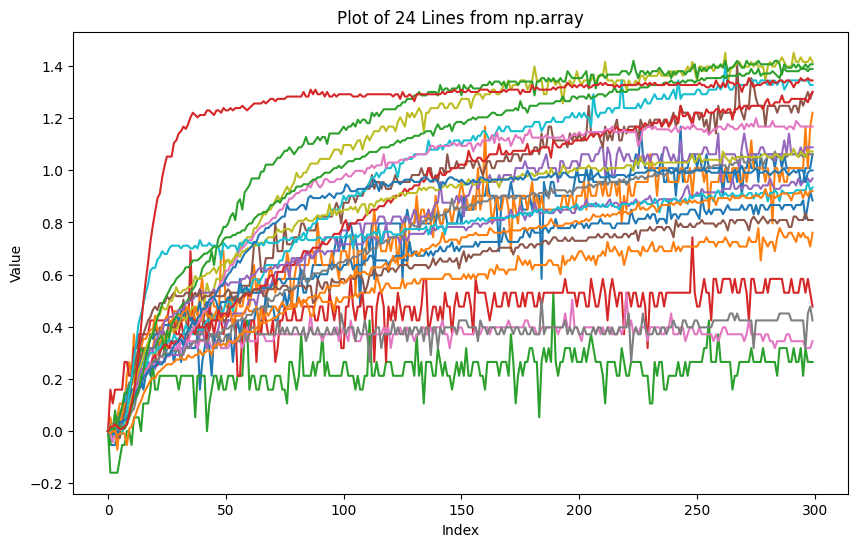

In [33]:
plt.figure(figsize=(10, 6))
for row in ident_data:
    plt.plot(row)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of 24 Lines from np.array')
plt.show()

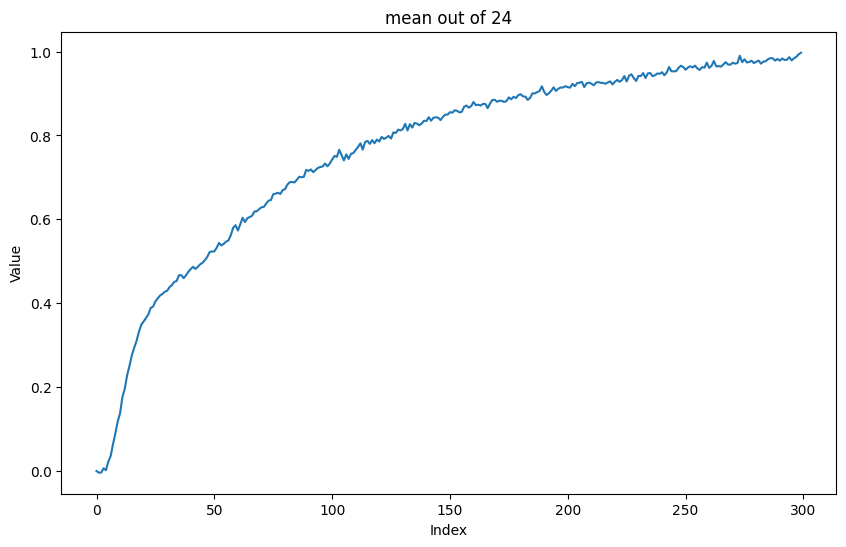

In [34]:
mean_row = np.mean(ident_data, axis=0)

plt.figure(figsize=(10, 6))

plt.plot(mean_row)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('mean out of 24')
plt.show()

In [103]:
K = np.mean(mean_row[-10:])
target_value = 0.632 * K
time_constant_idx = np.where(mean_row >= target_value)[0][0] if np.any(mean_row >= target_value) else None


In [104]:
K

0.9669039581491512

In [105]:
time_constant_idx

69

In [109]:
shift = 300

u_train = np.zeros((simu*len(relevantu)))
for index, file in enumerate(sorted(relevantu)):
    data = loadmat(file)
    u_train[index*simu:index*simu+simu] = data['uout'][shift:,1]

with open('u_train.pkl', 'wb') as file: 
    pickle.dump(u_train, file)

In [110]:
x_train = np.zeros((simx*len(relevantx)))
for index, file in enumerate(sorted(relevantx)):
    data = loadmat(file)
    x_train[index*simx:index*simx+simx] = data['T4'][shift:,0]
    
with open('x_train.pkl', 'wb') as file:
    pickle.dump(x_train, file)
    

In [111]:
len(x_train)

7206

In [113]:
train_real = {'Y': x_train.reshape(-1,1), 'U': u_train.reshape(-1,1)}
test_real = {'Y': x_train.reshape(-1,1), 'U': u_train.reshape(-1,1)}

with open('train_real.pkl', 'wb') as file:
    pickle.dump(train_real, file)
    
with open('test_real.pkl', 'wb') as file:
    pickle.dump(test_real, file)